In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\bvars\Downloads\Holiday_Package.csv",index_col=0)

In [5]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


In [6]:
df.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
868,no,40030,24,4,2,1,yes
869,yes,32137,48,8,0,0,yes
870,no,25178,24,6,2,0,yes
871,yes,55958,41,10,0,1,yes
872,no,74659,51,10,0,0,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [8]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [9]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


In [12]:
df.groupby(["foreign"]).count()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children
foreign,,,,,,
no,656,656,656,656,656,656
yes,216,216,216,216,216,216


### univariate / bivariate analysis

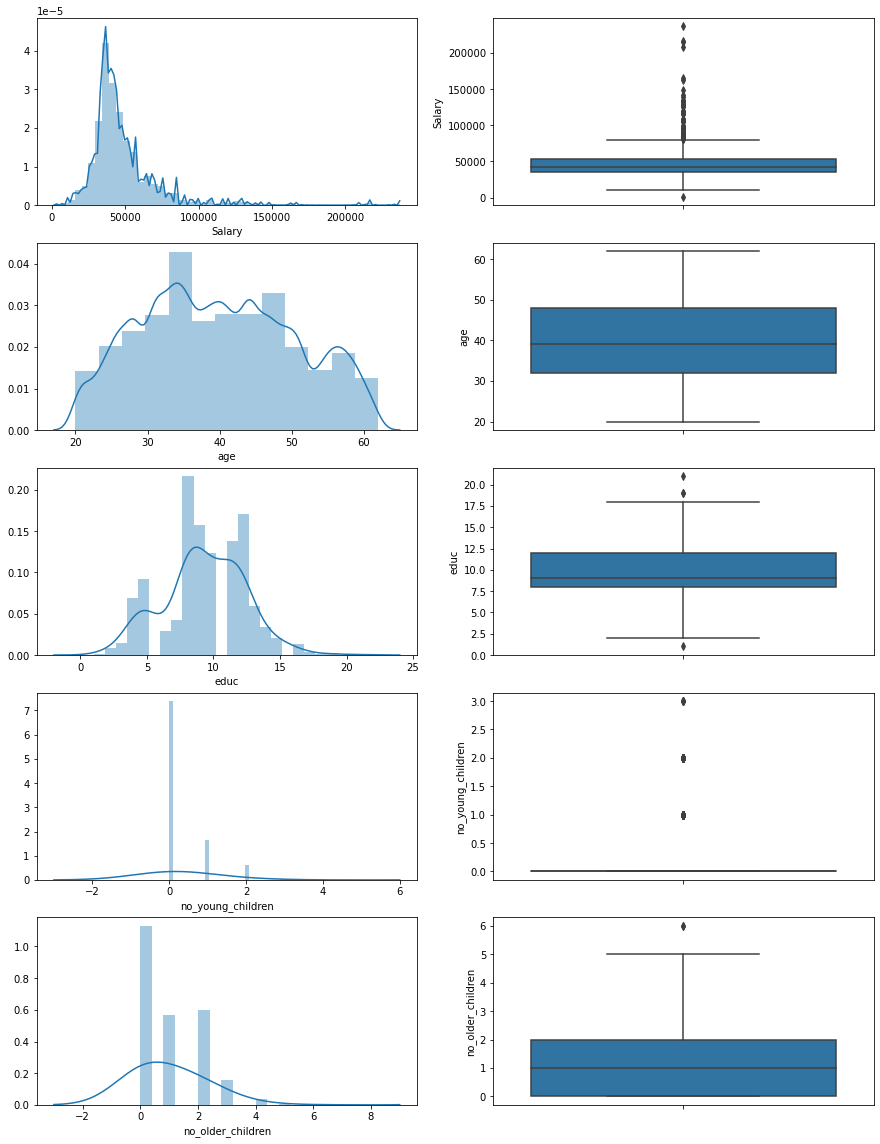

In [13]:
fig, axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,20)

a=sns.distplot(df['Salary'],kde_kws={'bw':1},ax=axes[0][0])
a=sns.boxplot(df['Salary'],orient='v',ax=axes[0][1])

a=sns.distplot(df['age'],kde_kws={'bw':1},ax=axes[1][0])
a=sns.boxplot(df['age'],orient='v',ax=axes[1][1])

a=sns.distplot(df['educ'],kde_kws={'bw':1},ax=axes[2][0])
a=sns.boxplot(df['educ'],orient='v',ax=axes[2][1])

a=sns.distplot(df['no_young_children'],kde_kws={'bw':1},ax=axes[3][0])
a=sns.boxplot(df['no_young_children'],orient='v',ax=axes[3][1])

a=sns.distplot(df['no_older_children'],kde_kws={'bw':1},ax=axes[4][0])
a=sns.boxplot(df['no_older_children'],orient='v',ax=axes[4][1])

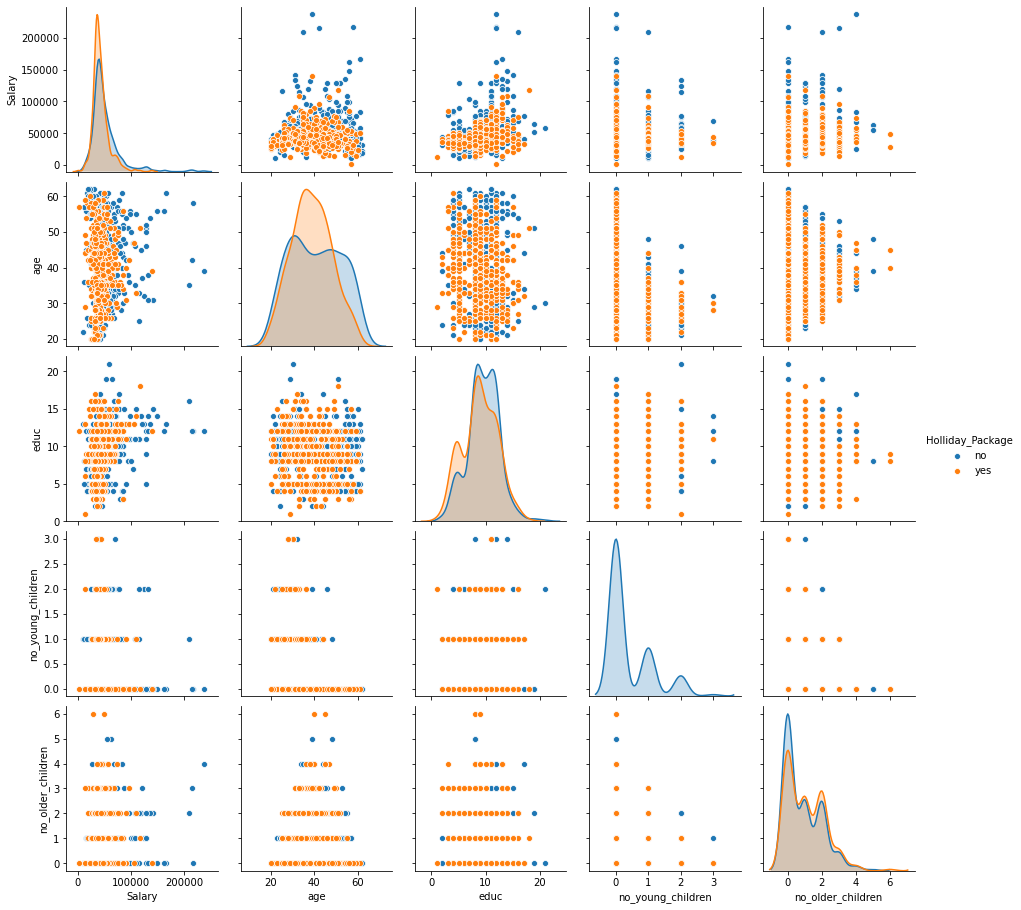

In [14]:
sns.pairplot(data=df,diag_kind='kde',hue="Holliday_Package")

### categorical variable analysis

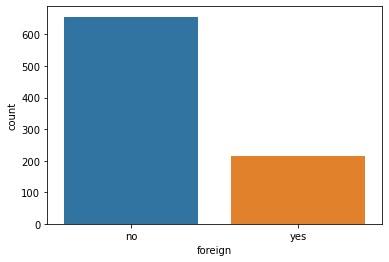

In [15]:
sns.countplot(x='foreign',data=df)

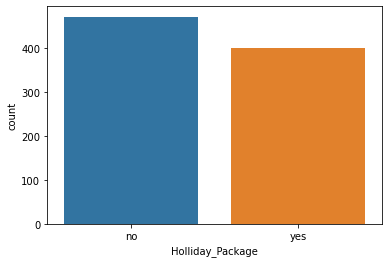

In [16]:
sns.countplot(x="Holliday_Package",data=df)

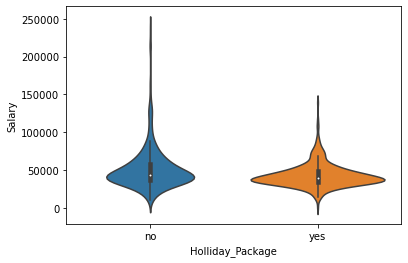

In [17]:
sns.violinplot(df["Holliday_Package"],df["Salary"])

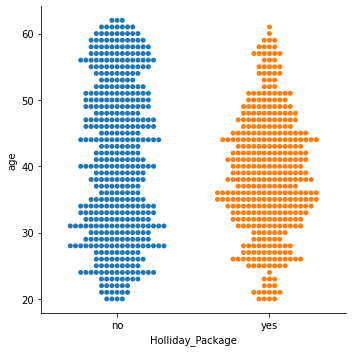

In [18]:
sns.catplot(x="Holliday_Package",y="age",kind="swarm",data=df)

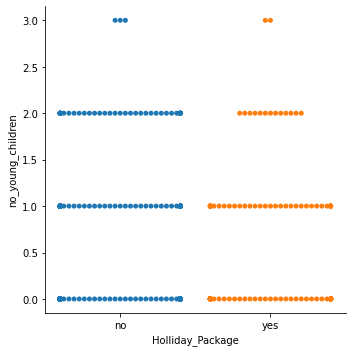

In [19]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)

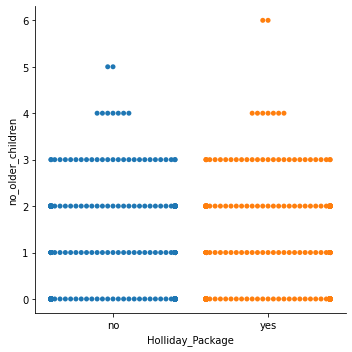

In [20]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)

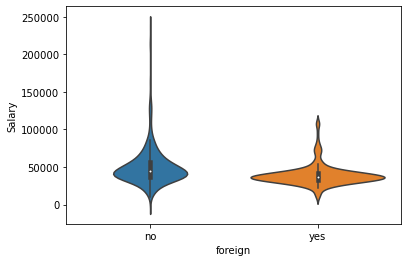

In [21]:
sns.violinplot(df["foreign"],df["Salary"])

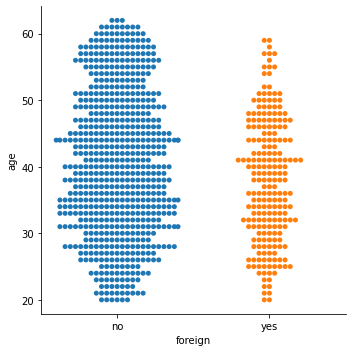

In [22]:
sns.catplot(x="foreign",y="age",kind="swarm",data=df)

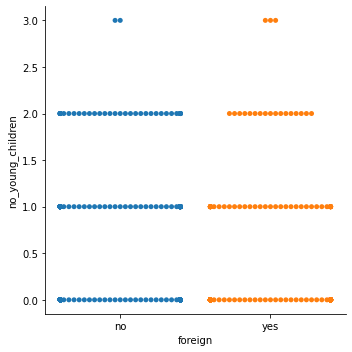

In [23]:
sns.catplot(x="foreign", y="no_young_children",kind="swarm",data=df)

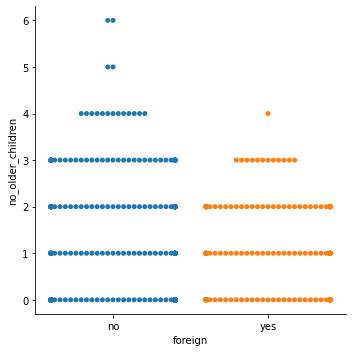

In [24]:
sns.catplot(x="foreign", y="no_older_children",kind="swarm",data=df)

In [25]:
df['no_young_children']=df['no_young_children'].astype('object')
df['no_older_children']=df['no_older_children'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    object
 5   no_older_children  872 non-null    object
 6   foreign            872 non-null    object
dtypes: int64(3), object(4)
memory usage: 94.5+ KB


### treating outliers


In [118]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index
cont

Index(['Salary', 'age', 'educ'], dtype='object')

In [119]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [120]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

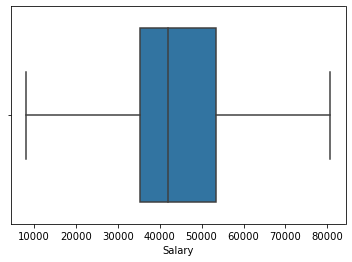

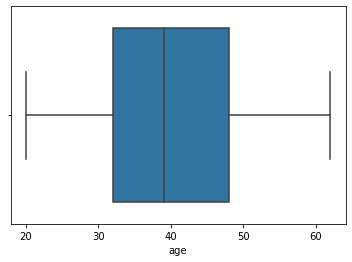

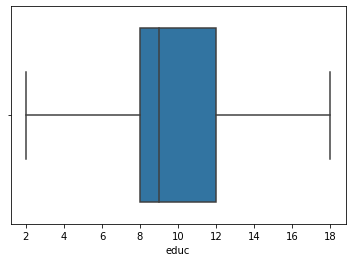

In [121]:
cols = ['Salary' ,'age', 'educ']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### correlation

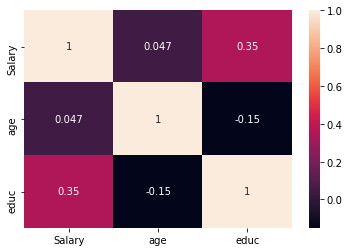

In [122]:
sns.heatmap(df.corr(),annot= True)

In [123]:
corr=df.corr()
corr

,Salary,age,educ
Salary,1.000000,0.047029,0.352913
age,0.047029,1.000000,-0.149682
educ,0.352913,-0.149682,1.000000


In [126]:
df2=df.copy()
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [127]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
1,48412.0,30.0,8.0,0,1,0,0
2,37207.0,45.0,8.0,0,1,1,0
3,58022.0,46.0,9.0,0,0,0,0
4,66503.0,31.0,11.0,0,0,0,0
5,66734.0,44.0,12.0,0,2,0,0


In [34]:
X=data.drop('Holliday_Package_yes',axis=1)
y=data['Holliday_Package_yes']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [130]:
from sklearn.model_selection import GridSearchCV

In [138]:
model=LogisticRegression(solver='liblinear',max_iter=100000,penalty='l2',verbose=True,n_jobs=2)

In [139]:
model.fit(X_train,y_train)

[LibLinear]

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', verbose=True)

In [140]:
model.score(X_train,y_train)

0.5377049180327869

In [145]:
ytrain_predict=model.predict(X_train)
ytest_predict=model.predict(X_test)

In [146]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.507480,0.492520
1,0.553645,0.446355
2,0.517205,0.482795
3,0.556636,0.443364
4,0.557389,0.442611


### confusion matrix

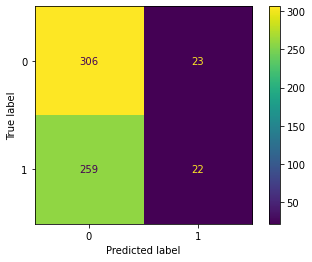

In [149]:
#confusion matrix on train data
plot_confusion_matrix(model,X_train,y_train)


In [150]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.54      0.93      0.68       329
           1       0.49      0.08      0.13       281

    accuracy                           0.54       610
   macro avg       0.52      0.50      0.41       610
weighted avg       0.52      0.54      0.43       610



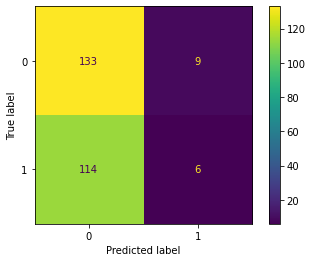

In [151]:
#confusion matrix on test data
plot_confusion_matrix(model,X_test,y_test)

In [152]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68       142
           1       0.40      0.05      0.09       120

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.39       262
weighted avg       0.48      0.53      0.41       262



### Applying gridsearchcv

In [153]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [154]:
model1 = LogisticRegression(max_iter=100000,n_jobs=2)

In [161]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [162]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [163]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)


In [164]:

best_model = grid_search.best_estimator_

In [165]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [166]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.636523,0.363477
1,0.576651,0.423349
2,0.650835,0.349165
3,0.568064,0.431936
4,0.536356,0.463644


              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



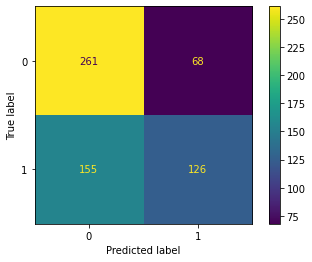

In [167]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



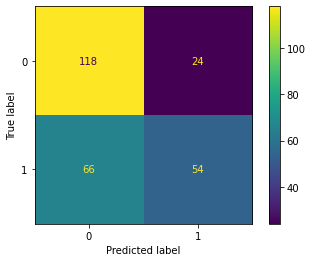

In [168]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [169]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6344262295081967

### AUC ROC 


AUC: 0.661


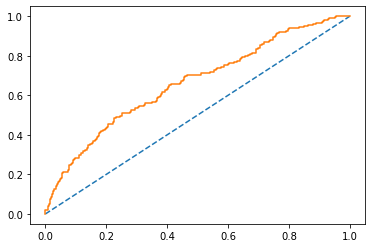

In [172]:
#auc for training data
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [173]:
best_model.score(X_test,y_test)

0.6564885496183206

AUC: 0.675


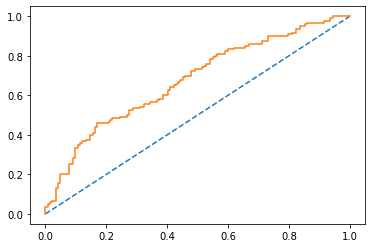

In [198]:
# auc for test data
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### LDA


In [175]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412.0,30.0,8.0,0,1,no
2,yes,37207.0,45.0,8.0,0,1,no
3,no,58022.0,46.0,9.0,0,0,no
4,no,66503.0,31.0,11.0,0,0,no
5,no,66734.0,44.0,12.0,0,2,no


In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    object 
 5   no_older_children  872 non-null    object 
 6   foreign            872 non-null    object 
dtypes: float64(3), object(4)
memory usage: 54.5+ KB


In [178]:
df2.shape

(872, 7)

In [181]:
df3=df2.copy()

In [182]:
df3.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412.0,30.0,8.0,0,1,no
2,yes,37207.0,45.0,8.0,0,1,no
3,no,58022.0,46.0,9.0,0,0,no
4,no,66503.0,31.0,11.0,0,0,no
5,no,66734.0,44.0,12.0,0,2,no


In [183]:
clf1=LinearDiscriminantAnalysis()
model3=clf1.fit(X_train,y_train)

In [185]:
pred_class_train=model3.predict(X_train)
pred_class_test=model3.predict(X_test)

In [187]:
#predeicting probability
pred_prob_train=model3.predict_proba(X_train)
pred_prob_test=model3.predict_proba(X_test)

In [188]:
model3.score(X_train,y_train)

0.6327868852459017

In [189]:
#classification report train data
print(classification_report(y_train,pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



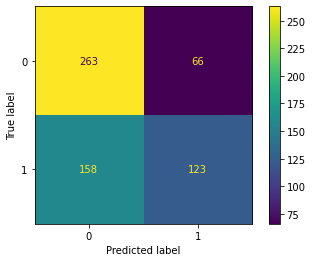

In [194]:
#confusion matrix for the train data
plot_confusion_matrix(model3,X_train,y_train)

In [191]:
#classification report on test data
print(classification_report(y_test,pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



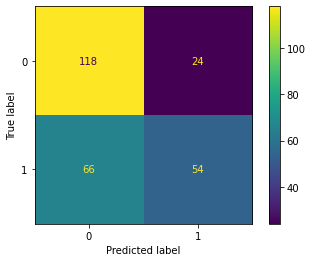

In [195]:
plot_confusion_matrix(model3,X_test,y_test)

### AUC AND ROC CURVE

AUC: 0.661


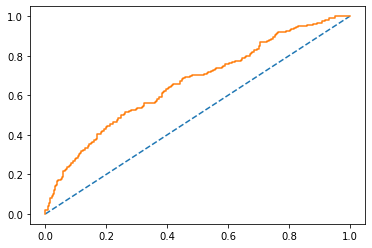

In [196]:
#auc for training data
# predict probabilities
probs = model3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.675


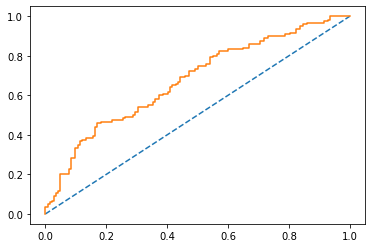

In [199]:
# auc for test data
# predict probabilities
probs = model3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);